# Comparing the total pass rate of the UK driving practical test in 2013 and 2014  # noqa:  E501

## Notes

### Question of interest

Was the overall mean pass for the UK driving practical test from April
2014 to March 2015 equal to 47.1%, the mean total pass rate from April
2013 to March 2014?

### Data

- Total pass rate of UK driving practical test from April 2014 to
  March 2015 was 47.1%
- Data consists of 316 observations of the overall pass rate at the
  UK's practical driving centres
- Data fields:
  - **centre** `str` : location of test centre
  - **type** `str` : who the pass rate is for, either `male`, `female`,
    or `total`
  - **pass_rate** `float` : mean percentage pass rate of males from April
    2014 to March 2015

### Method

- Data modelled using an approximate normal distribution
  - Checked assumption of symmetry using a histogram and normal
    probability plot
- Mean and 95% **z**-interval calculated for the total pass rate
- Performed **z**-test: mean total pass rate of the UK driving
  practical test was equal to 47.1%

### Results

- The data returned the descriptive column `type` as an `object`,
  rather than a `str`
  - This did not affect the analysis, so not remedial action was taken
- None of the visualisations showed using an approximate normal model
  was inappropriate
  - Frequency histogram shows the data are distributed unimodally and
    approximately symmetric
  - Probability plots show the data to closely follow a fitted straight
- Description of sample:
  - `Total(size=316, mean=49.630380, zconfint_mean=(48.840342, 50.420417))`
- **z**-test result
  - `ResultSummary(zstat=6.277492, pval=0.000000)`

### Discussion

- Null hypothesis is rejected with **p**-value < 0.000001
- Very strong evidence that the mean pass rate is not equal to 47.1%
- Given **z** > 0, conclude that there is evidence that the mean pass
  from April 2014 to March 2015 was greater than 47.1%
- Result suggests there was an increase in the overall mean total pass
  rate of the UK driving practical test

### Reference

m248.b.act23

-----

## Results

### Setup the notebook

In [1]:
# import packages and modules
from scipy import stats
import pandas as pd
import statsmodels.stats.weightstats as sm
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [2]:
# set seaborn theme
sns.set_theme()

In [3]:
# import custom modules not in root
sys.path[0] = "..\\"  # update path
from src import load, describe, summarise  # noqa: E402

### Import the data

In [4]:
# get data
prac_driving: pd.DataFrame = load.Data.get("pass_rates_uk_prac_driving_test")

In [5]:
# preview data
prac_driving.head()

,centre,type,pass_rate
0,Aberdeen North,male,49.9
1,Aberdeen South (Cove),male,50.9
2,Abergavenny,male,60.5
3,Aberystwyth,male,62.5
4,Airdrie,male,47.2


In [6]:
# check dtypes
prac_driving.dtypes

centre        object
type          object
pass_rate    float64
dtype: object

In [7]:
# get sample as series
total: pd.Series = prac_driving.query('type == "total"')["pass_rate"]

### Visualise the data

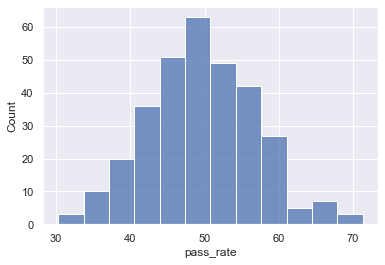

In [8]:
# frequency histogram
f, ax = plt.subplots()
ax = sns.histplot(x=total, bins=12)
plt.show()

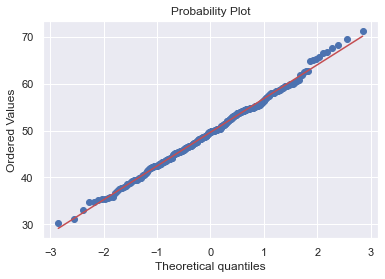

In [9]:
# probability plot of sample
f, ax = plt.subplots()
stats.probplot(x=total, plot=ax)
plt.show()

### Analyse the data

In [10]:
# initialise DescrStatsW object
dsw_total: sm.DescrStatsW = sm.DescrStatsW(data=total)

In [11]:
describe.ZSample(
    "Total", dsw_total.nobs, dsw_total.mean, dsw_total.zconfint_mean())

Total(size=316, mean=49.630380, zconfint_mean=(48.840342, 50.420417))

In [12]:
# hypothesised mean value
mu0 = 47.1

In [13]:
# run the test
zstat, pval = dsw_total.ztest_mean(value=mu0)
summarise.ZTest(zstat, pval)

ResultSummary(zstat=6.277492, pval=0.000000)